In [137]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [138]:
#import dataset

bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [139]:
# checking the shape of dataframe

bike_df.shape

(730, 16)

In [140]:
# describing the columns of dataframe

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [141]:
# checking for the null values in column data

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [142]:
# get the info about columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [143]:
# Copying the dataframe into new

bike_df_copy = bike_df.copy()

In [144]:
bike_df_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [145]:
# checking shape of the dataframe
bike_df_copy.shape

(730, 16)

In [146]:
# drop the duplicates in copy if any 

bike_df_copy.drop_duplicates(inplace=True)

In [147]:
# checking shape of the dataframe again
bike_df_copy.shape

(730, 16)

In [148]:
# it looks same we are good to go 

In [149]:
# dropping the unwanted columns
# dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike_df_copy.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [150]:
# Encoding/mapping the season column

# bike_df_copy.season = bike_df_copy.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [151]:
bike_df_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [152]:
#encoding mapping of following columns 'season','mnth','weekday','weathersit'

bike_df_copy.season = bike_df_copy.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df_copy.mnth = bike_df_copy.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df_copy.weekday = bike_df_copy.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df_copy.weathersit = bike_df_copy.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [153]:
bike_df_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [154]:
#EDA

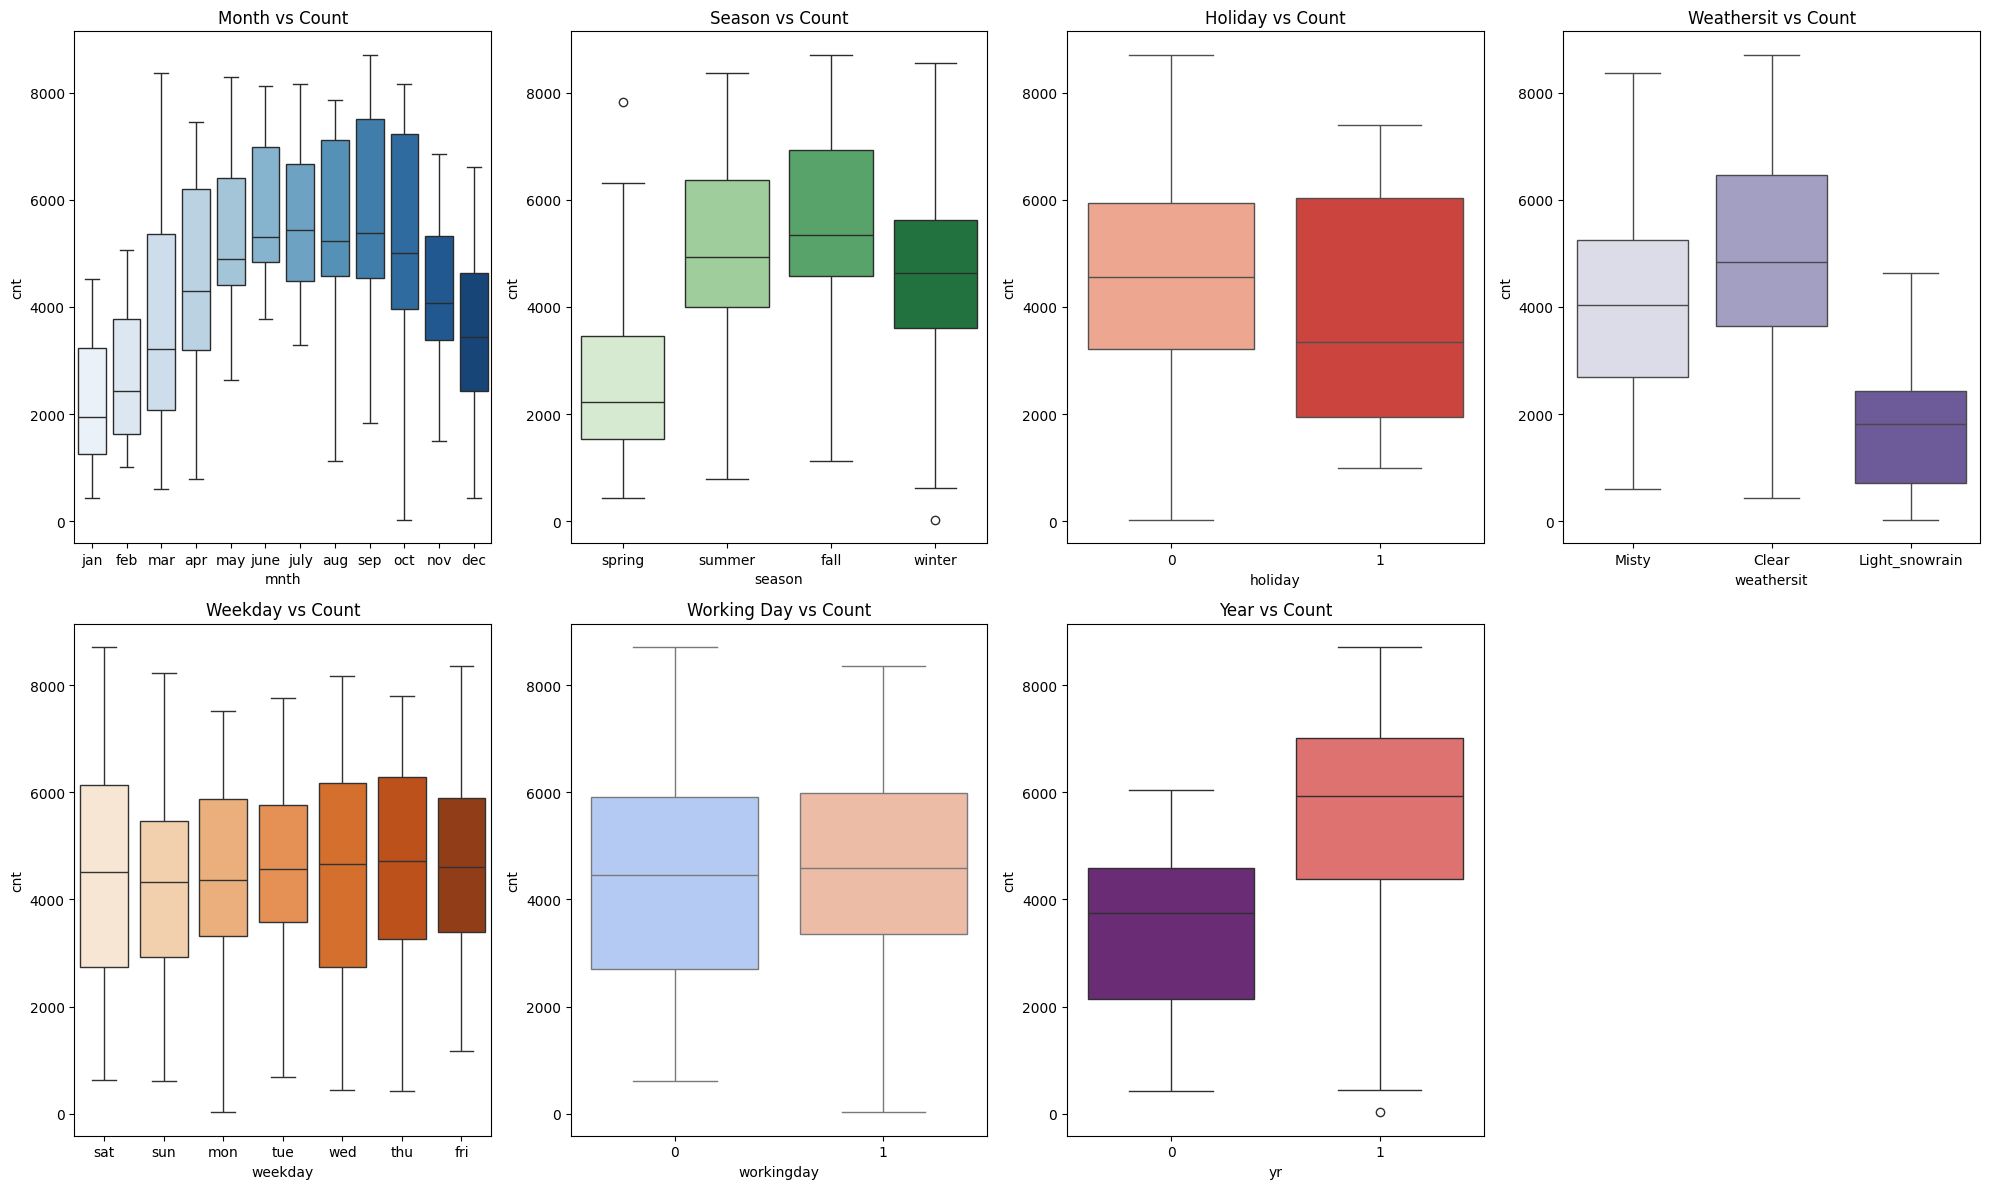

In [155]:
#need to see how other predicted variable stand against 'cnt' variable


plt.figure(figsize=(20, 12))


plt.subplot(2, 4, 1)
sns.boxplot(x='mnth', y='cnt', data=bike_df_copy, palette='Blues')
plt.title('Month vs Count')


plt.subplot(2, 4, 2)
sns.boxplot(x='season', y='cnt', data=bike_df_copy, palette='Greens')
plt.title('Season vs Count')


plt.subplot(2, 4, 3)
sns.boxplot(x='holiday', y='cnt', data=bike_df_copy, palette='Reds')
plt.title('Holiday vs Count')


plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_df_copy, palette='Purples')
plt.title('Weathersit vs Count')


plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_df_copy, palette='Oranges')
plt.title('Weekday vs Count')


plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_df_copy, palette='coolwarm')
plt.title('Working Day vs Count')


plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=bike_df_copy, palette='magma')
plt.title('Year vs Count')

plt.tight_layout()
plt.show()

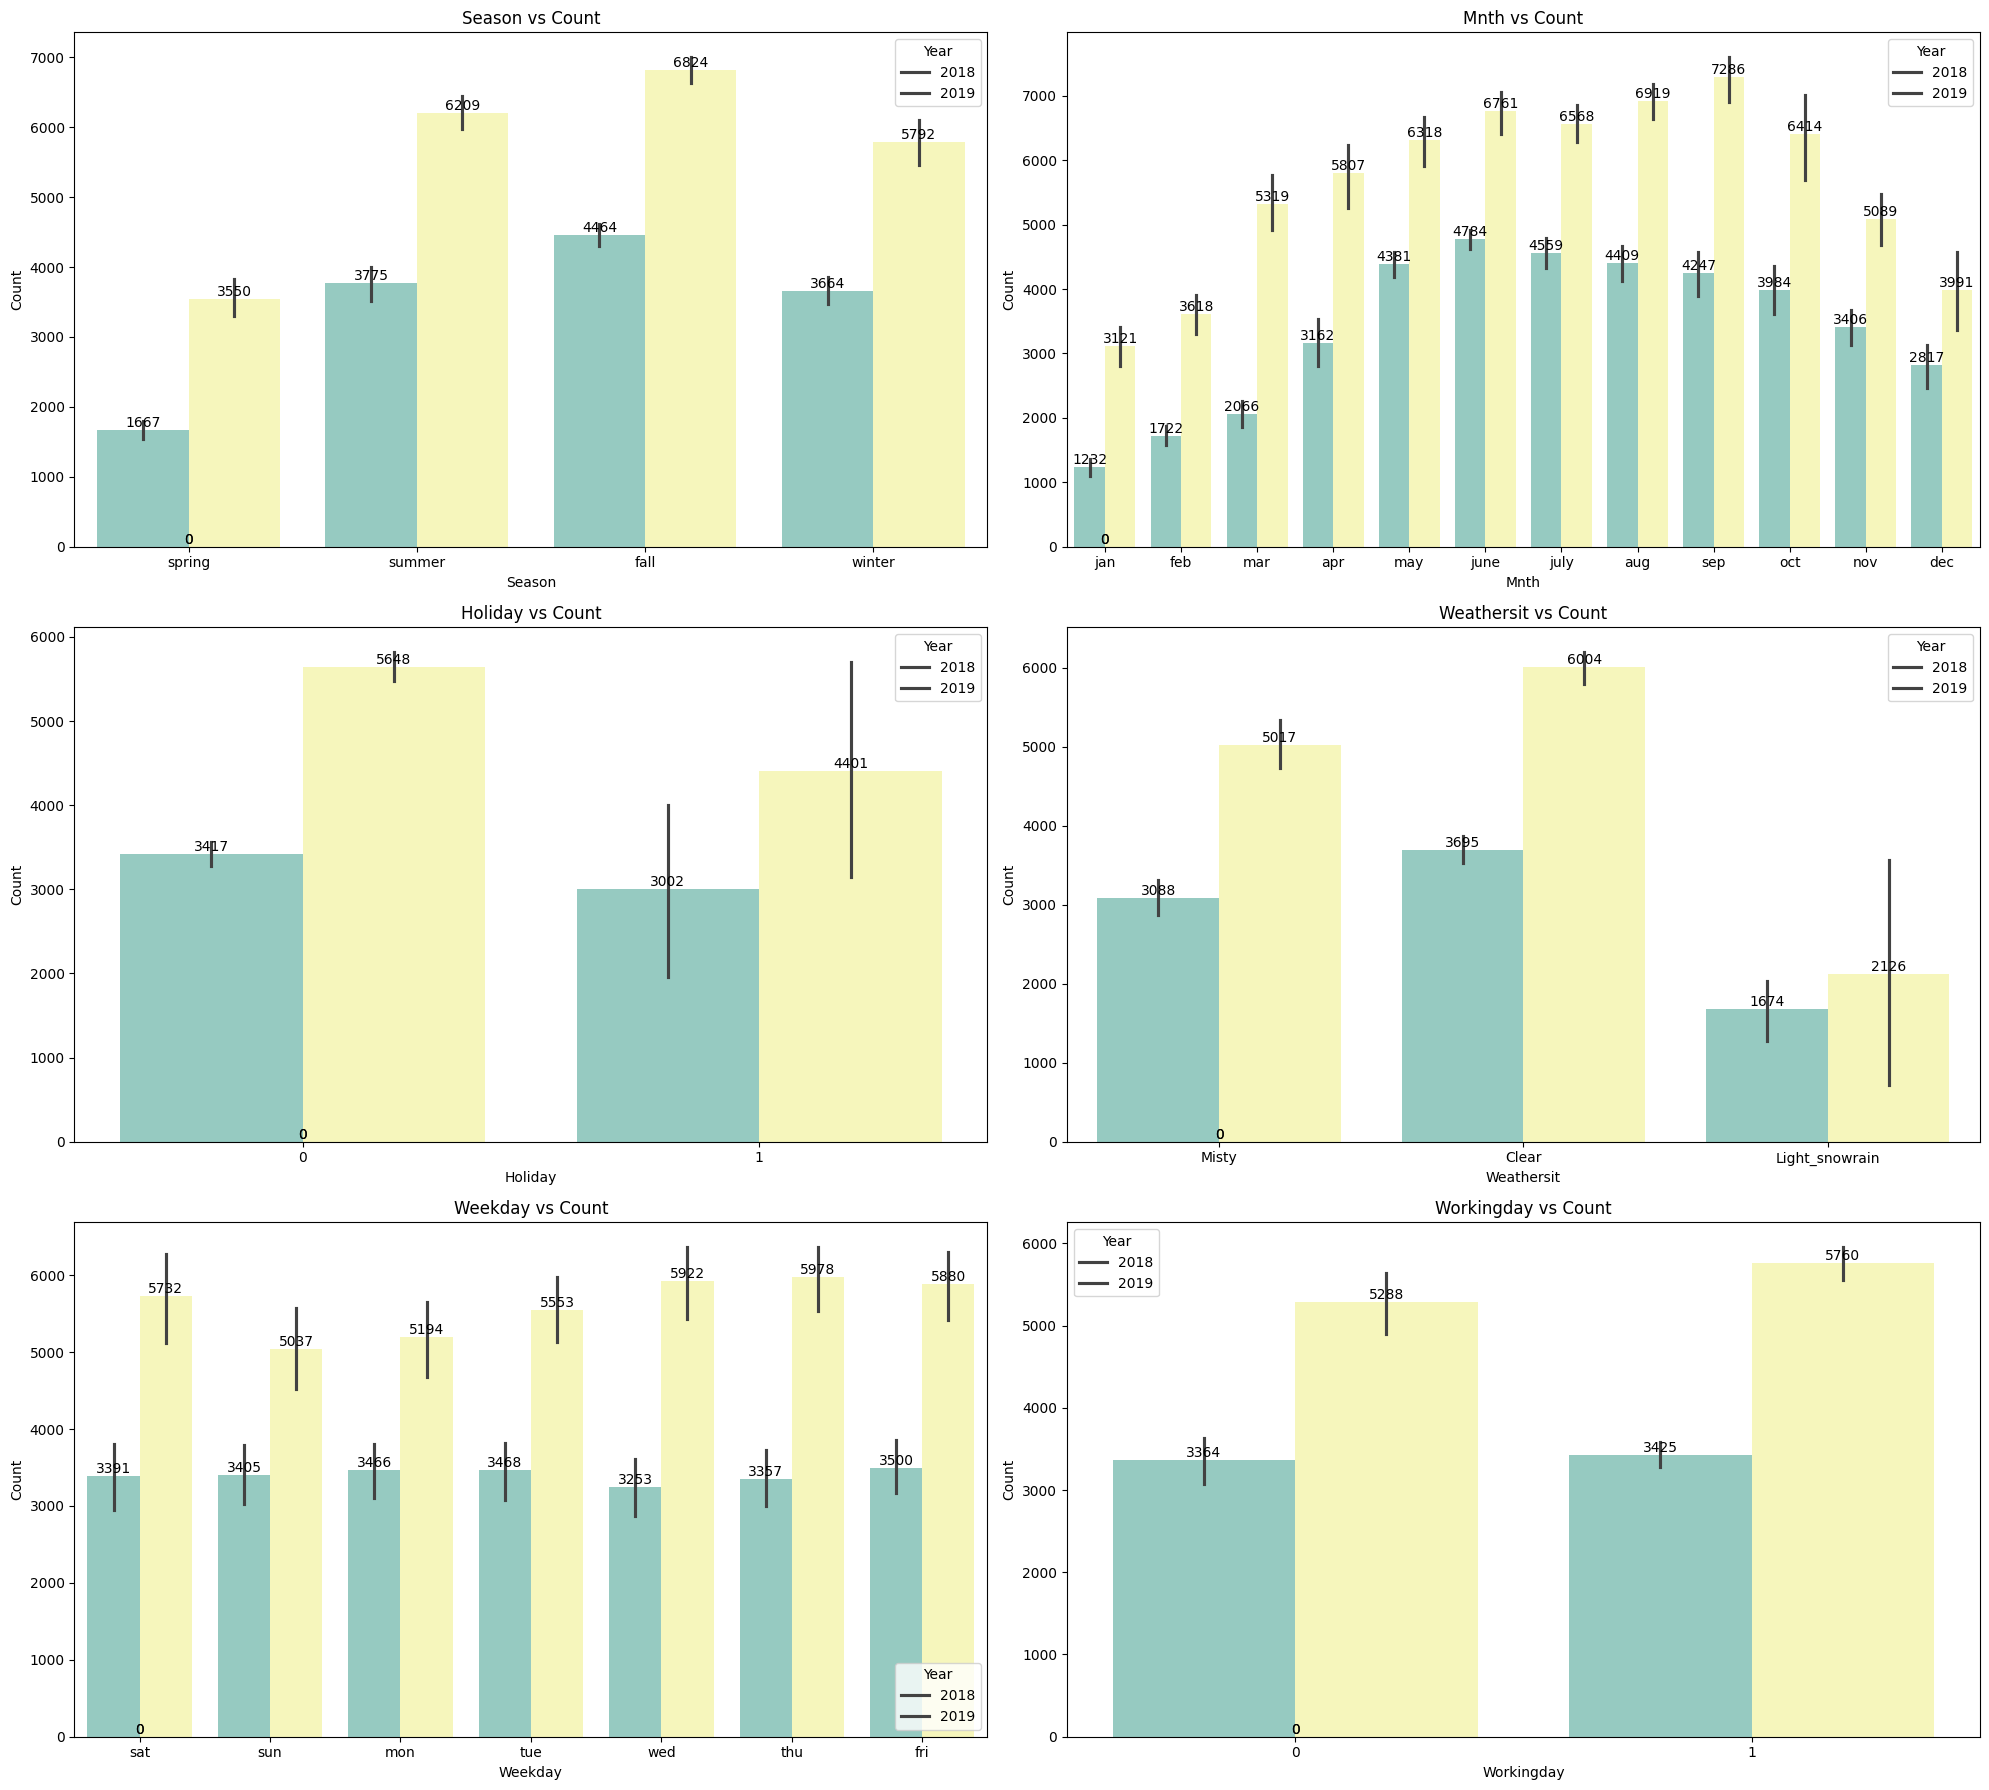

In [156]:
columns = ['season', 'mnth', 'holiday', 'weathersit', 'weekday', 'workingday']

plt.figure(figsize=(20, 18))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    ax = sns.barplot(x=column, y='cnt', data=bike_df_copy, hue='yr', palette='Set3')
    plt.title(f'{column.capitalize()} vs Count')
    plt.legend(labels=['2018', '2019'], title='Year')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.0f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.tight_layout()
plt.show()

In [157]:
#numerical variable 

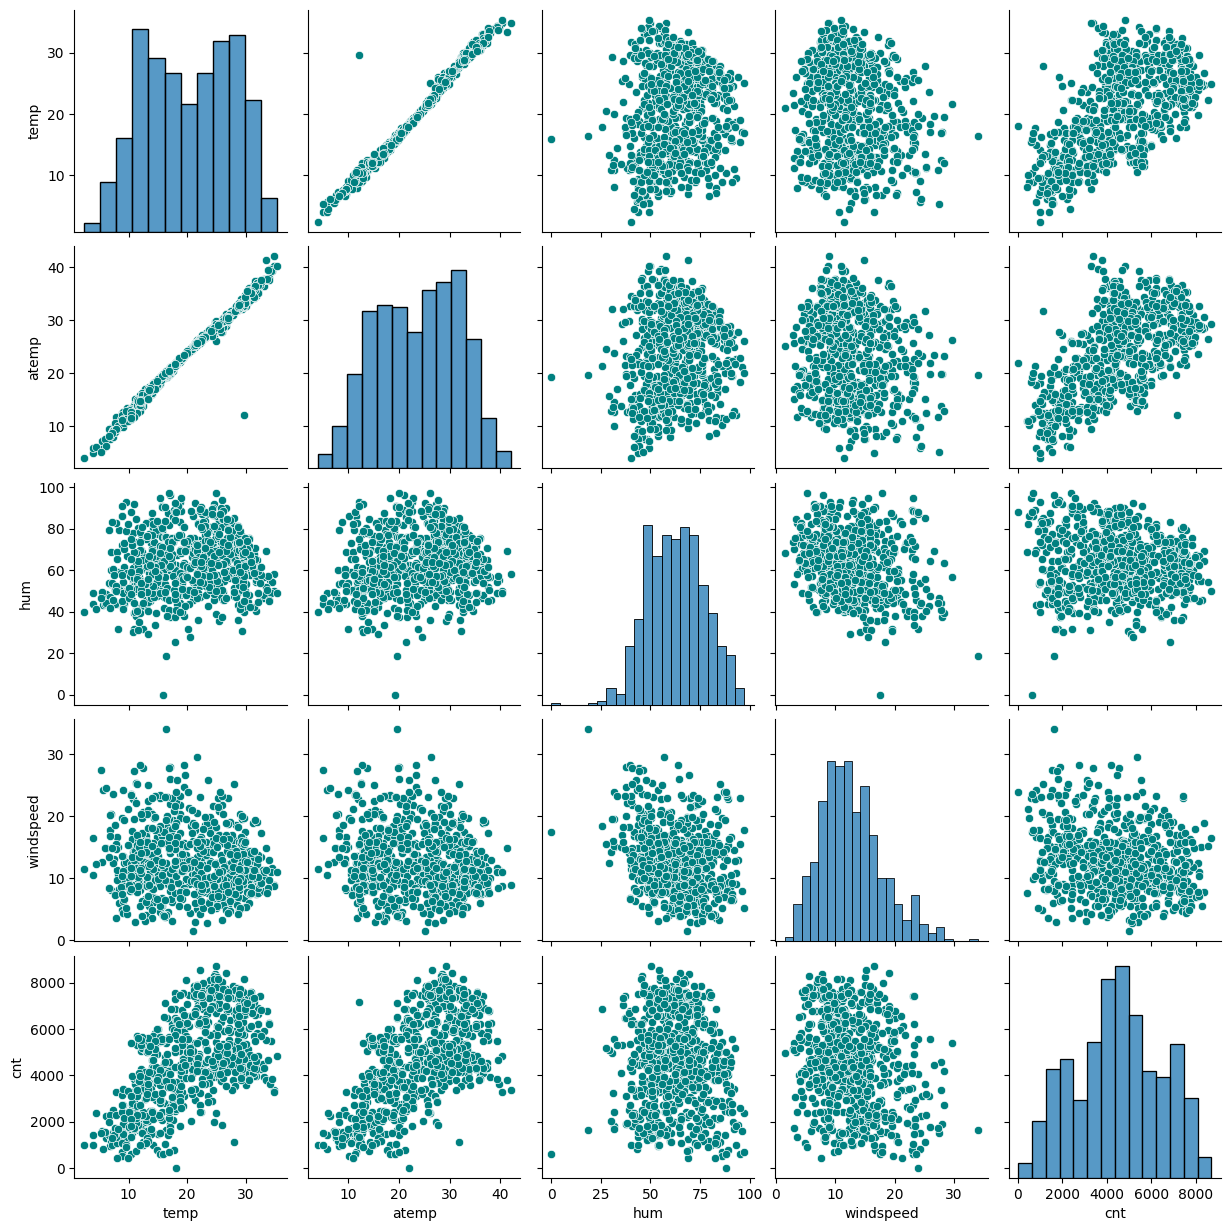

In [158]:
sns.pairplot(data=bike_df_copy, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'], plot_kws={'color': 'teal'})

plt.show()

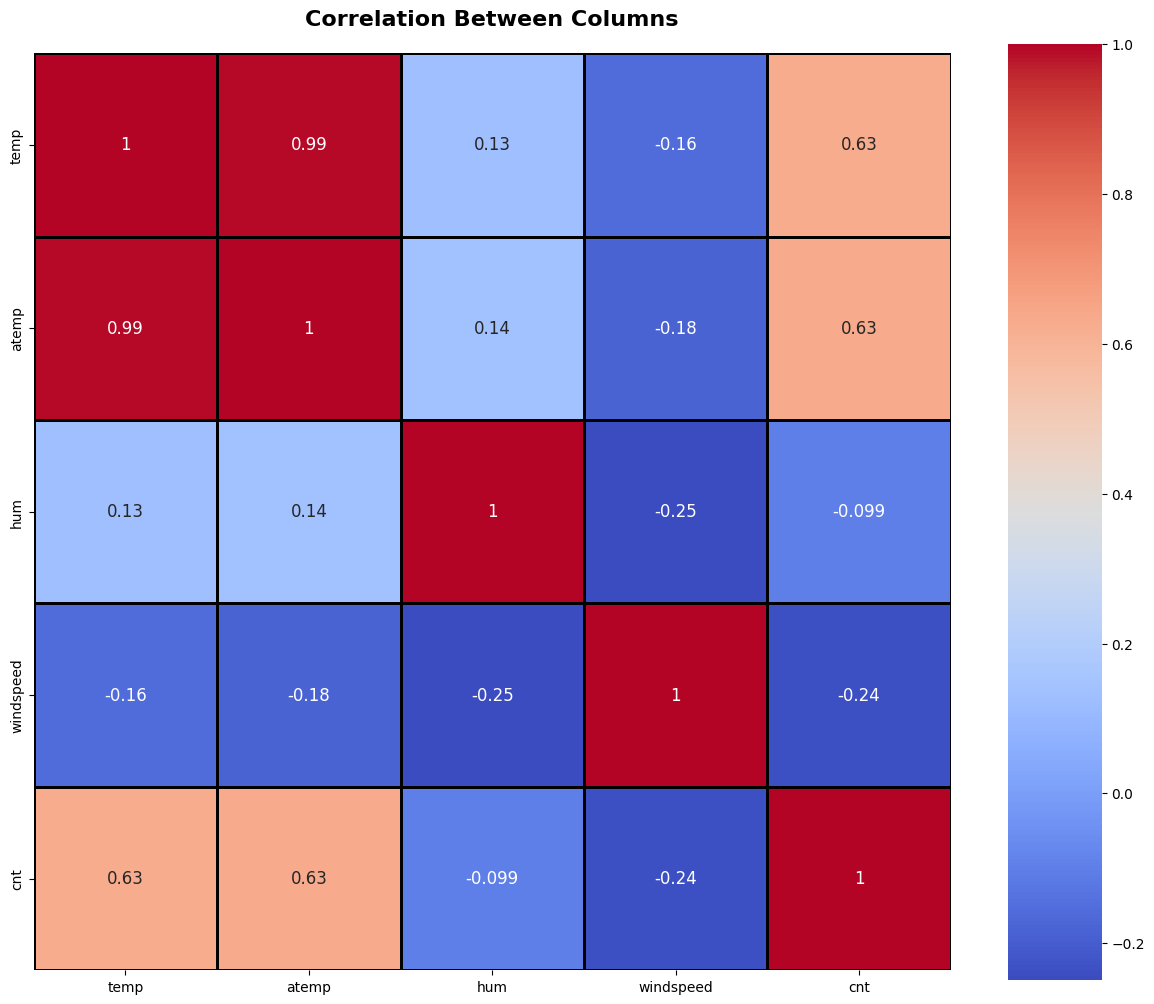

In [159]:
#heatmap

plt.figure(figsize=(12, 12))

sns.heatmap(
    bike_df_copy[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), 
    annot=True, 
    cmap="coolwarm", 
    linewidths=1,
    linecolor='black',
    annot_kws={"size": 12},
    square=True,
    cbar_kws={"shrink": 0.8, "aspect": 10},
)


plt.title("Correlation Between Columns", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.tight_layout()
plt.show()

In [160]:
#There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [161]:
# dummy variable creation 

In [162]:
#dummy variable from category column i have converted it to int type so that we dont have interfare with true and false values

months_bike_df_copy=pd.get_dummies(bike_df_copy.mnth,drop_first=True).astype(int)
weekdays_bike_df_copy=pd.get_dummies(bike_df_copy.weekday,drop_first=True).astype(int)
weathersit_bike_df_copy=pd.get_dummies(bike_df_copy.weathersit,drop_first=True).astype(int)
seasons_bike_df_copy=pd.get_dummies(bike_df_copy.season,drop_first=True).astype(int)

new_bike_data = pd.concat([bike_df_copy,months_bike_df_copy,weekdays_bike_df_copy,weathersit_bike_df_copy,seasons_bike_df_copy],axis=1)
new_bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [163]:
#we can now delete categorical column 

new_bike_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [164]:
new_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int64  
 9   dec             730 non-null    int64  
 10  feb             730 non-null    int64  
 11  jan             730 non-null    int64  
 12  july            730 non-null    int64  
 13  june            730 non-null    int64  
 14  mar             730 non-null    int64  
 15  may             730 non-null    int64  
 16  nov             730 non-null    int64  
 17  oct             730 non-null    int

In [165]:
#train data
np.random.seed(0)
df_train, df_test = train_test_split(new_bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [166]:
print(f"Train Shape: {df_train.shape} and Test Shape: {df_test.shape}")

Train Shape: (510, 30) and Test Shape: (219, 30)


In [167]:
# min max scaler
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [168]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [169]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


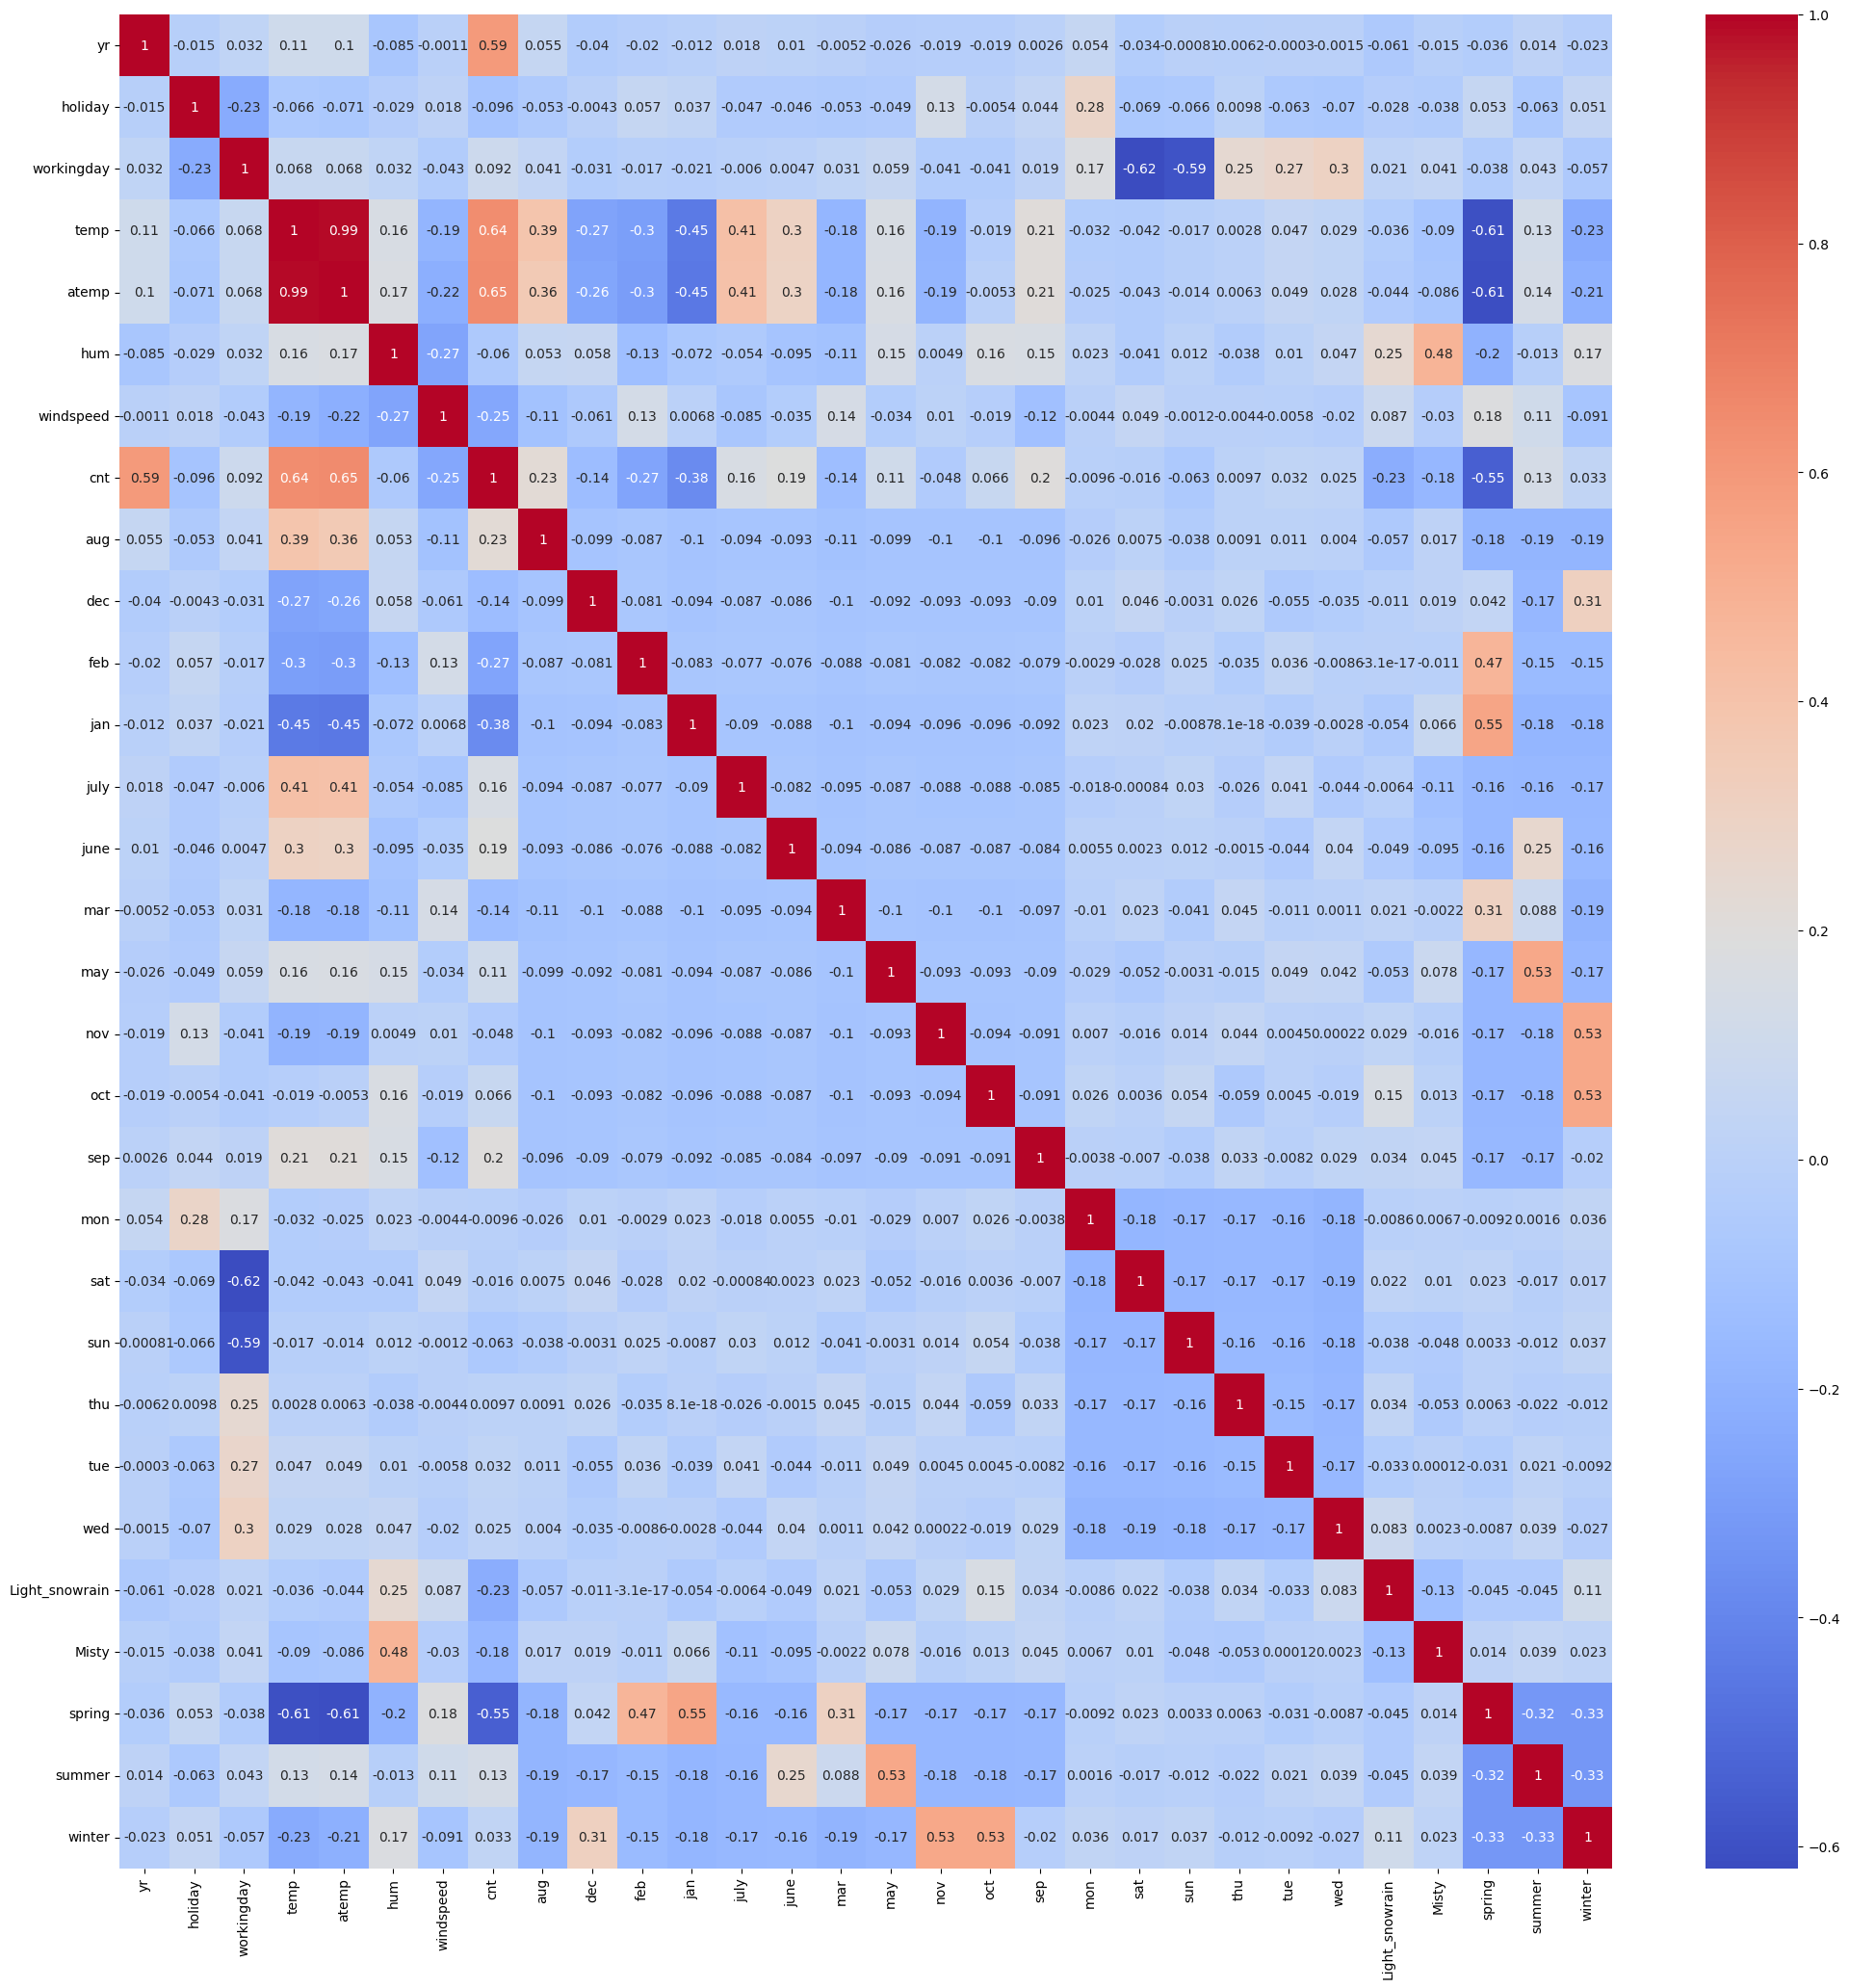

In [170]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

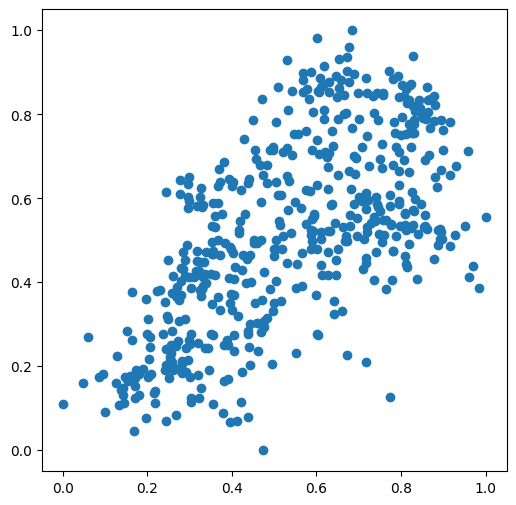

In [171]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [172]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [173]:
# Recursive feature elimination 

lm_model = LinearRegression()

# Perform RFE with 15 features to select
rfe = RFE(estimator=lm_model, n_features_to_select=15)

# Fit RFE on training data
rfe = rfe.fit(X_train, y_train)

In [174]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [175]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [176]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [177]:
X_train_rfe = X_train[col]

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.48
13,summer,2.84
11,Misty,2.29
0,yr,2.09
9,sat,1.98


In [178]:
#Building a linear model

X_train_rfe_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_rfe_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          2.31e-191
Time:                        11:54:14   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

In [180]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
11,spring,3.08
12,summer,2.33
0,yr,2.08
13,winter,1.99
8,sat,1.97
5,jan,1.62
6,july,1.59


In [181]:
#model 2
X_train_rfe_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_rfe_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          7.33e-189
Time:                        11:54:36   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [182]:
# As temp shows high VIF values hence we can drop it
X_train_new_1 = X_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_1.values, i) for i in range(X_train_new_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.27
12,winter,1.99
0,yr,1.91
7,sat,1.69
4,jan,1.60
9,Misty,1.56
5,july,1.30


In [183]:
# Building 3rd linear regression model

X_train_rfe_lm_3 = sm.add_constant(X_train_new_1)
lr_3 = sm.OLS(y_train,X_train_rfe_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          4.04e-154
Time:                        11:54:56   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5448      0.020     27.

In [184]:
# it looks like july has high p value variable

X_train_new_2 = X_train_new_1.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.00
0,yr,1.89
11,winter,1.78
6,sat,1.62
4,jan,1.60
8,Misty,1.56
5,sep,1.20


In [185]:
# Building 4rd linear regression model

X_train_rfe_lm_4 = sm.add_constant(X_train_new_2)
lr_4 = sm.OLS(y_train,X_train_rfe_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.62e-155
Time:                        11:57:55   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5409      0.018     29.

In [186]:
# it looks like holiday has high p value variable

X_train_new_3 = X_train_new_2.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,1.99
0,yr,1.88
10,winter,1.73
3,jan,1.60
5,sat,1.56
7,Misty,1.56
4,sep,1.18


In [187]:
# Building 5rd linear regression model

X_train_rfe_lm_5 = sm.add_constant(X_train_new_3)
lr_5 = sm.OLS(y_train,X_train_rfe_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.30e-155
Time:                        12:00:38   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5334      0.018     30.

In [188]:
# we can consider lr_5 as  it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

In [189]:
# F-Statistics value of 160.0 (which is greater than 1) and the p-value of 1.30e-155 i.e almost equals to zero, states that the overall model is significant

In [190]:
# This means about 77.9% of the variation in the dependent variable (cnt) is explained by the independent variables in the model.

In [191]:
# This value takes into account the number of predictors in the model, providing a more accurate measure of model fit.

In [193]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.533414
yr                0.247992
workingday        0.056660
windspeed        -0.188736
jan              -0.103085
sep               0.071353
sat               0.065027
Light_snowrain   -0.303393
Misty            -0.088820
spring           -0.258069
summer           -0.040579
winter           -0.072862
dtype: float64

In [194]:
X_train_rfe_lm_5

,const,yr,workingday,windspeed,jan,sep,sat,Light_snowrain,Misty,spring,summer,winter
653,1.0,1,1,0.300794,0,0,0,0,0,0,0,1
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,0,1,0,1,1,0,0
728,1.0,1,0,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.188475,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.355596,0,0,0,0,1,0,1,0
578,1.0,1,1,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.431816,0,0,1,0,1,0,0,1


In [195]:
y_train_pred = lr_5.predict(X_train_rfe_lm_5)

Text(0.5, 0, 'Errors')

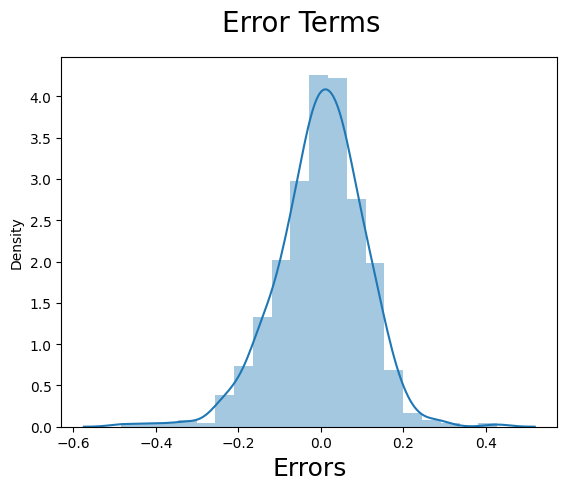

In [202]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [203]:
# Multi Colinearity

In [204]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,1.99
0,yr,1.88
10,winter,1.73
3,jan,1.60
5,sat,1.56
7,Misty,1.56
4,sep,1.18


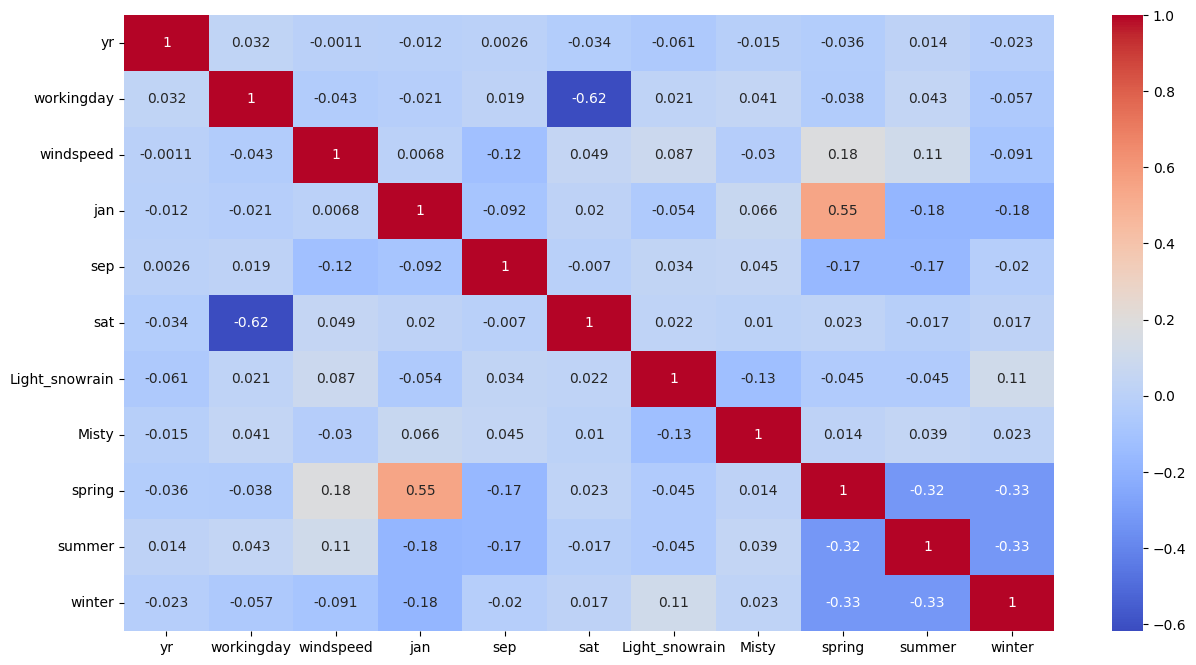

In [205]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new_3.corr(),annot = True, cmap="coolwarm")
plt.show()

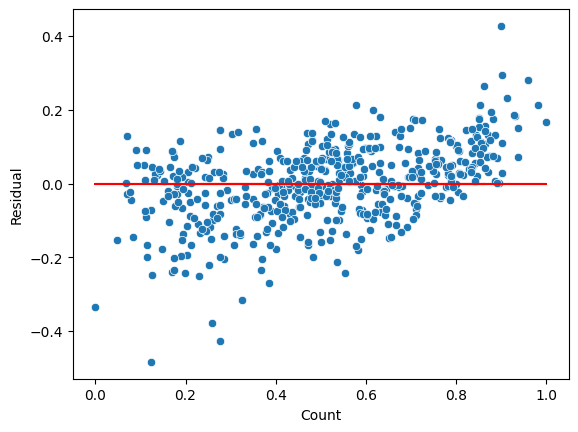

In [209]:
residual = y_train - y_train_pred

# Create scatterplot
sns.scatterplot(x=y_train, y=residual)

# Add a red line for residuals = 0 (i.e., y_train - y_train)
plt.plot(y_train, (y_train - y_train), '-r')

# Set labels
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

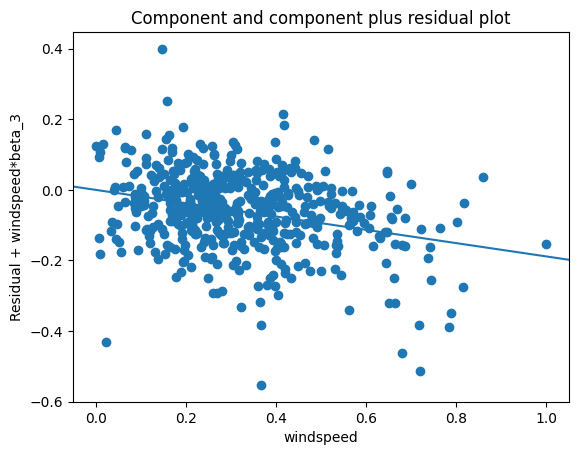

In [211]:
#linearlity
sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

In [ ]:
# Making Predictions Using the Final Model

In [216]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [217]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
y_test = df_test.pop('cnt')
X_test = df_test

In [222]:
col1 = X_train_new_3.columns

X_test = X_test[col1]

X_test_lm_6 = sm.add_constant(X_test)

In [223]:
y_pred = lr_5.predict(X_test_lm_6)

In [224]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7409

Text(0, 0.5, 'y_pred')

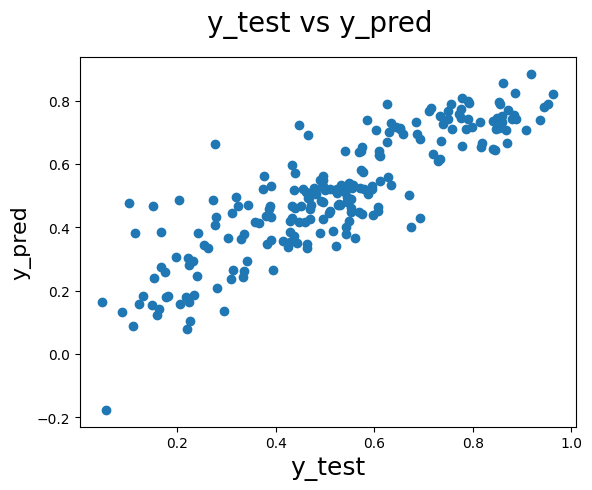

In [225]:
# y_test vs y_predict

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [226]:
round(lr_5.params,4)

const             0.5334
yr                0.2480
workingday        0.0567
windspeed        -0.1887
jan              -0.1031
sep               0.0714
sat               0.0650
Light_snowrain   -0.3034
Misty            -0.0888
spring           -0.2581
summer           -0.0406
winter           -0.0729
dtype: float64

In [227]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7272


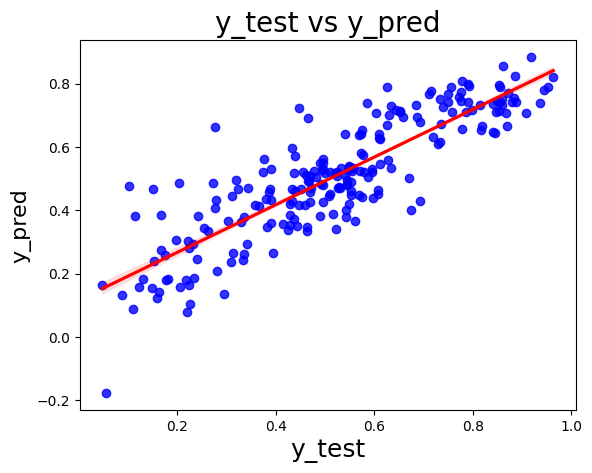

In [228]:

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()